In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from config import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import numpy as np
import seaborn as sns
from datetime import datetime

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Set the news sources list
targets = ['BBC', 'CBS', 'CNN', 'FoxNews', 'nytimes', 'NPR']

In [86]:
# Get 100 tweets data from each account

# Variable to store emotional lists from each source
total_mood = []

for target in targets:
    
    last_tweet = None
    
    tweet_counter = 1
    
    for x in range(5):
        
        all_data = api.user_timeline(target, count=20, max_id=last_tweet, page=x)
            
        for tweet in all_data:
            
            emotions = analyzer.polarity_scores(tweet['text'])
            
            total_mood.append({'source': target,
                             'compound': emotions['compound'],
                             'positive': emotions['pos'],
                             'negative': emotions['neg'],
                             'neutral': emotions['neu'],
                             'tweets_ago': tweet_counter,
                             'text': tweet['text'],
                             'time': tweet['created_at'],
                              'likes': tweet['favorite_count'],
                              'RT': tweet['retweet_count']})
            
            tweet_counter += 1

        last_tweet = tweet["id"] - 1
    
len(total_mood)

600

2545

,RT,compound,likes,negative,neutral,positive,text,time,tweets_ago,user
0,16,0.0000,28,0.000,1.000,0.000,🎭 Andrew Scott performs the opening lines of #...,Tue Apr 03 18:03:05 +0000 2018,1,BBC
1,5,-0.5411,13,0.304,0.576,0.119,No time to shop or cook? No problem! \n🍠🥑🍅🍗🥒\n...,Tue Apr 03 17:03:04 +0000 2018,2,BBC
2,15,-0.7351,0,0.265,0.735,0.000,"RT @BBCTwo: Tonight at 9pm, a cancer surgeon r...",Tue Apr 03 16:22:33 +0000 2018,3,BBC
3,8,0.0000,23,0.000,1.000,0.000,🐊💦 Fancy a dip? https://t.co/gpfkGcue3C,Tue Apr 03 16:02:04 +0000 2018,4,BBC
4,44,0.7351,129,0.000,0.754,0.246,What's it like to live with a brain tumour? \n...,Tue Apr 03 15:05:05 +0000 2018,5,BBC
5,3539,0.0000,0,0.000,1.000,0.000,RT @BBCR1: Yessssss @NiallOfficial's Live Loun...,Tue Apr 03 14:50:24 +0000 2018,6,BBC
6,19,0.0000,0,0.000,1.000,0.000,RT @BBCFOUR: Meet the woman who rocked the dar...,Tue Apr 03 14:47:02 +0000 2018,7,BBC
7,28,0.0000,0,0.000,1.000,0.000,RT @TWBBC: Koko is a gorilla who has learnt si...,Tue Apr 03 14:27:34 +0000 2018,8,BBC
8,8,0.0000,33,0.000,1.000,0.000,A Chinese family have been reunited with their...,Tue Apr 03 13:15:07 +0000 2018,9,BBC
9,51,0.0000,0,0.000,1.000,0.000,RT @bbccomedy: Philomena Cunk examines the bar...,Tue Apr 03 12:57:41 +0000 2018,10,BBC


In [87]:
# Create a DF from the received data
df = pd.DataFrame(total_mood)
df.head(5)

,RT,compound,likes,negative,neutral,positive,source,text,time,tweets_ago
0,33,0.0000,76,0.000,1.000,0.000,BBC,🎭 Andrew Scott performs the opening lines of #...,Tue Apr 03 18:03:05 +0000 2018,1
1,6,-0.5411,14,0.304,0.576,0.119,BBC,No time to shop or cook? No problem! \n🍠🥑🍅🍗🥒\n...,Tue Apr 03 17:03:04 +0000 2018,2
2,19,-0.7351,0,0.265,0.735,0.000,BBC,"RT @BBCTwo: Tonight at 9pm, a cancer surgeon r...",Tue Apr 03 16:22:33 +0000 2018,3
3,8,0.0000,25,0.000,1.000,0.000,BBC,🐊💦 Fancy a dip? https://t.co/gpfkGcue3C,Tue Apr 03 16:02:04 +0000 2018,4
4,45,0.7351,138,0.000,0.754,0.246,BBC,What's it like to live with a brain tumour? \n...,Tue Apr 03 15:05:05 +0000 2018,5


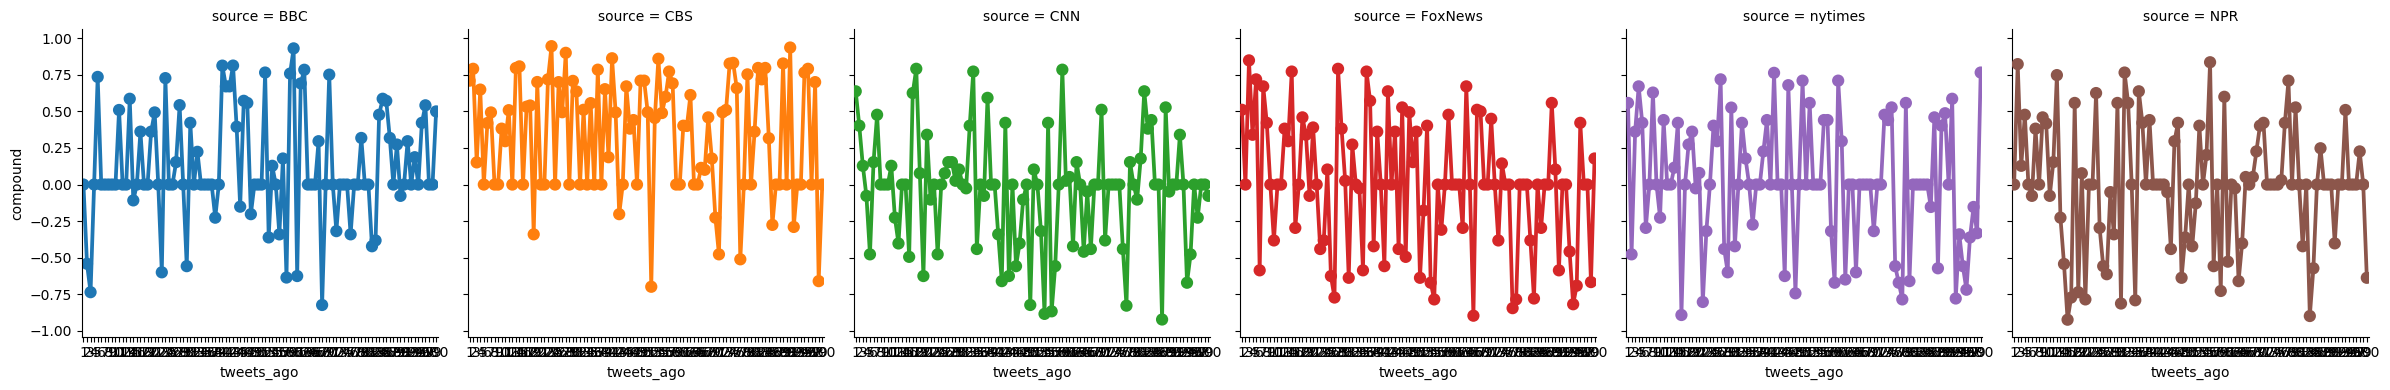

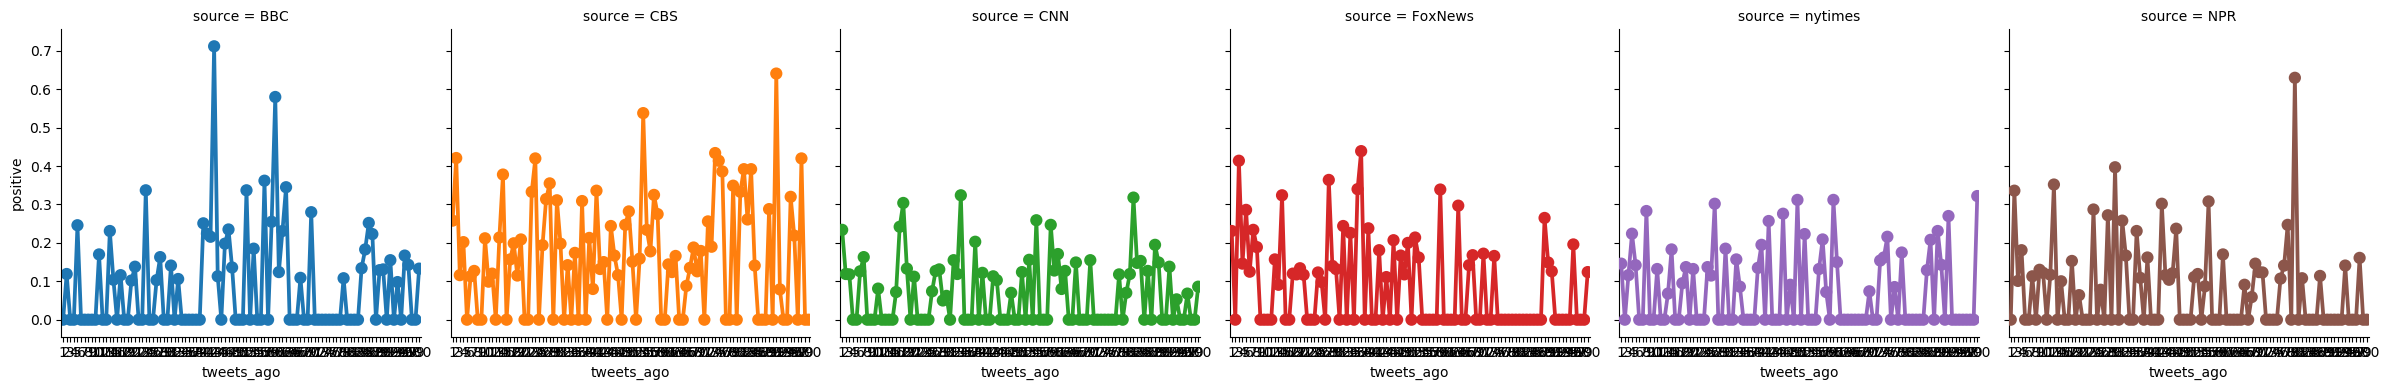

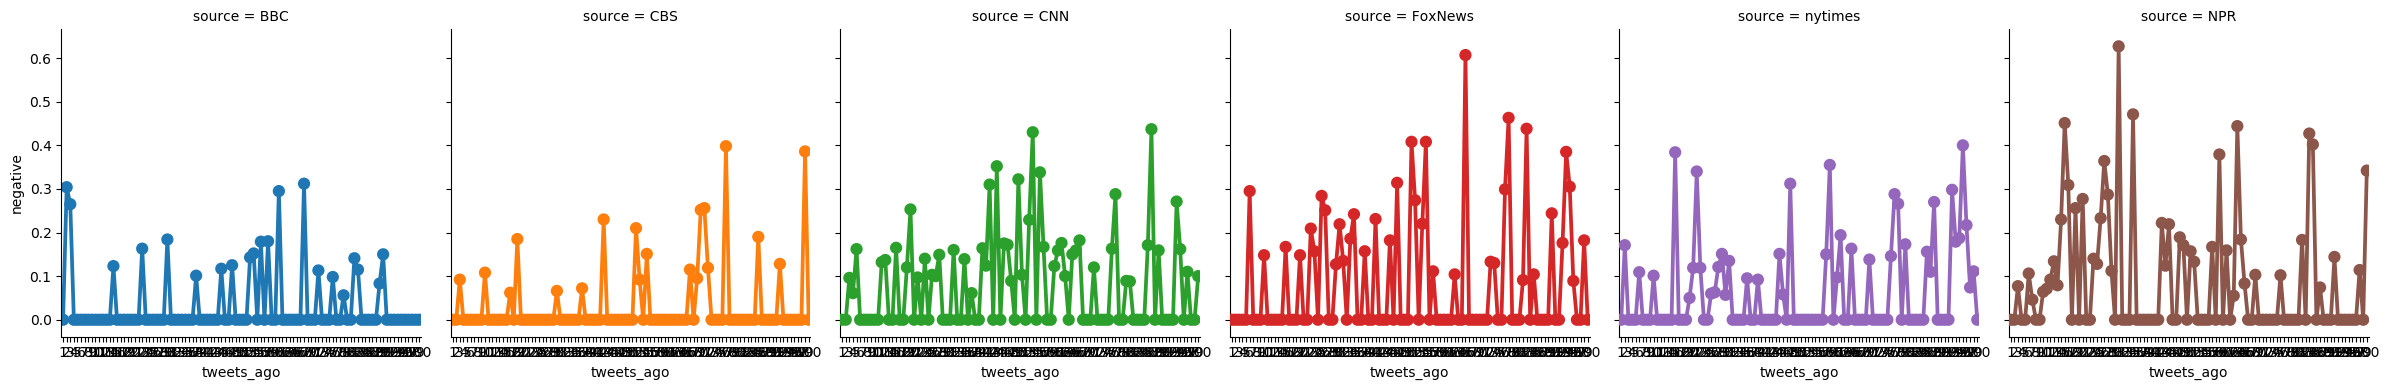

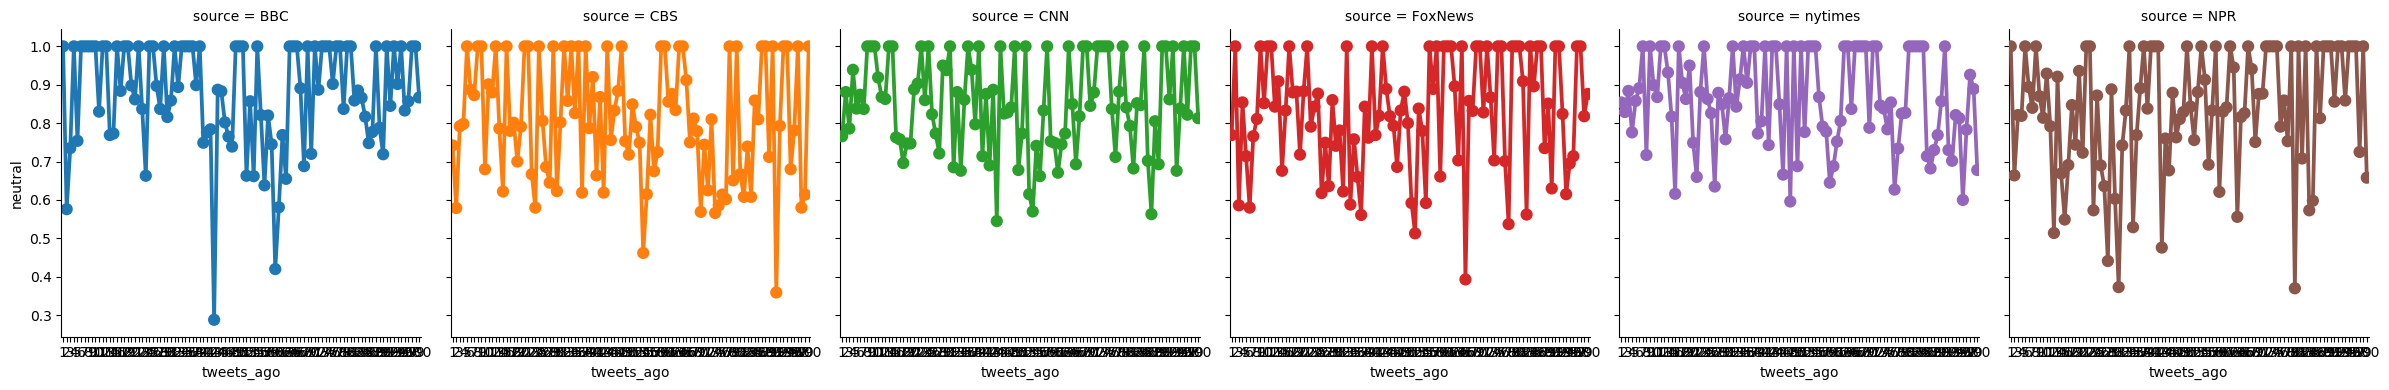

In [88]:
# Look at each news source separately
plt.rcParams.update(plt.rcParamsDefault) # Set default plot style
sentilist = ['compound', 'positive', 'negative', 'neutral']
for i in range(len(sentilist)):
    sns.factorplot(data=df, x="tweets_ago", y=sentilist[i], col="source", hue='source')

From theese graphs we can see, that CBS and BBC are generally more positive than the other sources. FoxNews on the other hand, is mostly on the negative side.

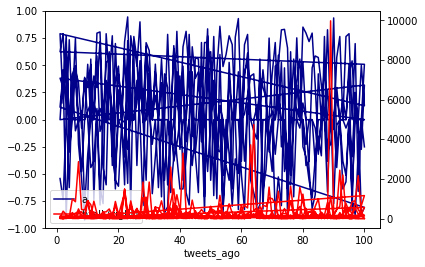

In [6]:
ax=df.plot(kind='line', x='tweets_ago', y='compound', ylim=[-1,1], color='DarkBlue', style='-', label='a')
df.plot(kind='line', x='tweets_ago', y='likes', secondary_y=True, color='Red', style='-', label='hfall', ax=ax)

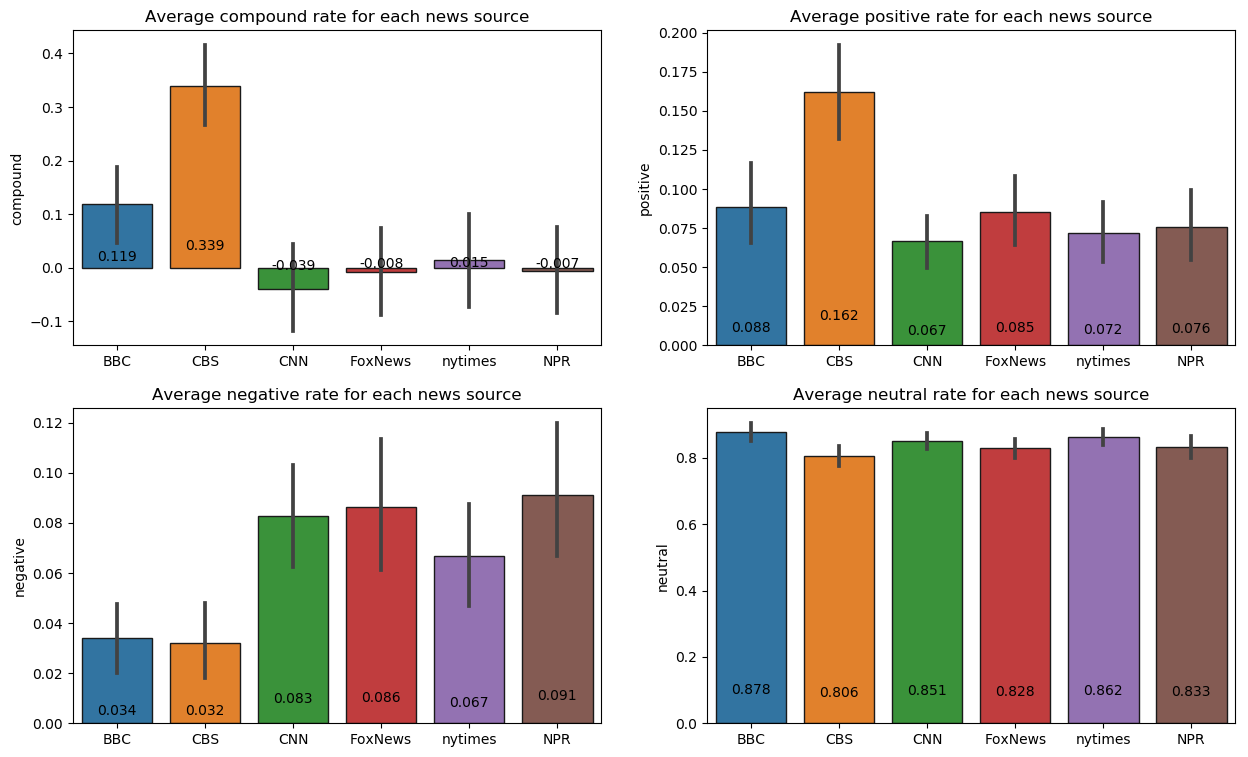

In [89]:
# Let's take a closer look and see the distribution of the each sentiment for each user using Bar charts.

plt.figure(figsize=(15,9))
for x in range(len(sentilist)):
    plt.subplot(2,2,x+1)
    ax = sns.barplot('source', sentilist[x], data=df, linewidth=1, edgecolor=".1")
    ax.set_title(f'Average {sentilist[x]} rate for each news source')
    ax.set_xlabel('')
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., p.get_height()*0.1, '{:1.3f}'.format(p.get_height()), ha="center")


Our assumptions were confirmed: CBS is a leader in positive tweets creating, BBC is on the second place. CNN and NY Times are close to neutral overage score. FoxNews has the highest negative rate and NPR is the second major source of the negative tweets.

It is interesting to see wich sourc has more likes and retweets

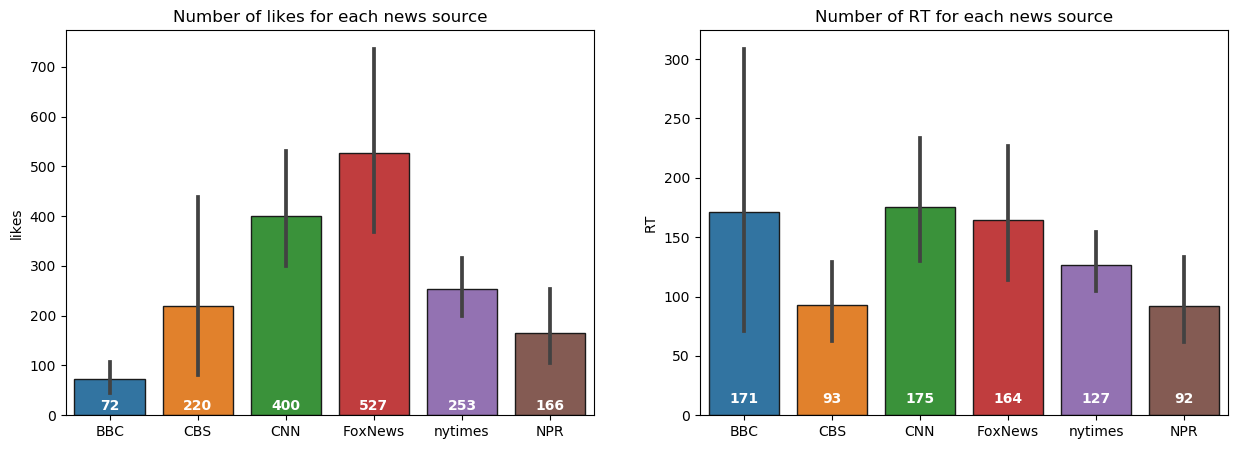

In [91]:
newlist = ['likes', 'RT']
plt.figure(figsize=(15,5))
for x in range(len(newlist)):
    plt.subplot(1,2,x+1)
    ax = sns.barplot('source', newlist[x], data=df, linewidth=1, edgecolor=".1")
    ax.set_title(f'Number of {newlist[x]} for each news source')
    ax.set_xlabel('')
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., 10, '{:1.0f}'.format(p.get_height()), ha="center", color='w', weight='bold')


Interesting correlation - FoxNews with it's negative tweets has significantly more likes, than positive CBS and BBC. Speaking about NPR, seems like it's negative polarity is much different from FoxNews because people don't like it a lot. Also FN is among the sources with the highest retweet rate, what we can't say about NPR and CBS.

**Below I want to compare the tweet creation date and the overal emotion rate during this date for each source**

Seems like CBS sends tweets very rarely, hence I need to get more tweets from other sources, to make data compatible

In [93]:
total_mood2 = []

for target in targets:
    
    #print(target)
    last_tweet = None
    
    tweet_counter = 1
    
    for x in range(10):
        
        if target == 'NPR' or target == 'nytimes':
            all_data = api.user_timeline(target, count=50, max_id=last_tweet, page=x)
        elif target == 'FoxNews' or target == 'CNN':
            all_data = api.user_timeline(target, count=70, max_id=last_tweet, page=x)
        elif target == 'BBC':
            all_data = api.user_timeline(target, count=10, max_id=last_tweet, page=x)
        else:
            all_data = api.user_timeline(target, count=5, max_id=last_tweet, page=x)
            
            
        for tweet in all_data:
            
            emotions = analyzer.polarity_scores(tweet['text'])
            
            total_mood2.append({'source': target,
                             'compound': emotions['compound'],
                             'positive': emotions['pos'],
                             'negative': emotions['neg'],
                             'neutral': emotions['neu'],
                             'tweets_ago': tweet_counter,
                             'text': tweet['text'],
                             'time': tweet['created_at'],
                              'likes': tweet['favorite_count'],
                              'RT': tweet['retweet_count']})
            
            tweet_counter += 1

        last_tweet = tweet["id"] - 1
    
len(total_mood2)

2550

In [95]:
df2 = pd.DataFrame(total_mood2)
df2.head(5)

,RT,compound,likes,negative,neutral,positive,source,text,time,tweets_ago
0,39,0.0000,94,0.000,1.000,0.000,BBC,🎭 Andrew Scott performs the opening lines of #...,Tue Apr 03 18:03:05 +0000 2018,1
1,6,-0.5411,15,0.304,0.576,0.119,BBC,No time to shop or cook? No problem! \n🍠🥑🍅🍗🥒\n...,Tue Apr 03 17:03:04 +0000 2018,2
2,19,-0.7351,0,0.265,0.735,0.000,BBC,"RT @BBCTwo: Tonight at 9pm, a cancer surgeon r...",Tue Apr 03 16:22:33 +0000 2018,3
3,8,0.0000,27,0.000,1.000,0.000,BBC,🐊💦 Fancy a dip? https://t.co/gpfkGcue3C,Tue Apr 03 16:02:04 +0000 2018,4
4,45,0.7351,142,0.000,0.754,0.246,BBC,What's it like to live with a brain tumour? \n...,Tue Apr 03 15:05:05 +0000 2018,5


In [96]:
# The code below converts twitter date format to regular dates and add it to a new column.
# Converting code was taken from StackOverflow and I haven't figured out how it works yet.

import re
datedf = df2.copy()
datedf['conv_time'] = ''
for ind, row in datedf.iterrows():
    twitter_time = row['time']
    remove_ms = lambda x:re.sub("\+\d+\s","",x) # magic
    mk_dt = lambda x:datetime.strptime(remove_ms(x), "%a %b %d %H:%M:%S %Y") # magic
    my_form = lambda x:"{:%m-%d-%y}".format(mk_dt(x)) #magic
    datedf.at[ind, 'conv_time'] = my_form(twitter_time)
datedf.head()

,RT,compound,likes,negative,neutral,positive,source,text,time,tweets_ago,conv_time
0,39,0.0000,94,0.000,1.000,0.000,BBC,🎭 Andrew Scott performs the opening lines of #...,Tue Apr 03 18:03:05 +0000 2018,1,04-03-18
1,6,-0.5411,15,0.304,0.576,0.119,BBC,No time to shop or cook? No problem! \n🍠🥑🍅🍗🥒\n...,Tue Apr 03 17:03:04 +0000 2018,2,04-03-18
2,19,-0.7351,0,0.265,0.735,0.000,BBC,"RT @BBCTwo: Tonight at 9pm, a cancer surgeon r...",Tue Apr 03 16:22:33 +0000 2018,3,04-03-18
3,8,0.0000,27,0.000,1.000,0.000,BBC,🐊💦 Fancy a dip? https://t.co/gpfkGcue3C,Tue Apr 03 16:02:04 +0000 2018,4,04-03-18
4,45,0.7351,142,0.000,0.754,0.246,BBC,What's it like to live with a brain tumour? \n...,Tue Apr 03 15:05:05 +0000 2018,5,04-03-18


In [97]:
grouped_date = datedf.groupby(['conv_time', 'source'])
grouped_df = grouped_date.mean().reset_index('source')
grouped_df.head()

,source,RT,compound,likes,negative,neutral,positive,tweets_ago
conv_time,,,,,,,,
01-29-18,CBS,305.7,0.49286,1663.7,0.0,0.7683,0.2317,45.5
01-31-18,CBS,16.0,0.82032,65.2,0.0,0.6100,0.3900,38.0
02-09-18,CBS,15.0,0.84780,0.0,0.0,0.6960,0.3040,35.0
02-12-18,CBS,166.0,0.00000,0.0,0.0,1.0000,0.0000,33.5
02-13-18,CBS,12.5,0.37530,0.0,0.0,0.8740,0.1260,31.5


CBS makes to much noise with it's Super positive tweets, so I exclude it from data

In [99]:
nocbs = grouped_df.reset_index()
nocbs_df = nocbs[nocbs['source'] !='CBS'].set_index('conv_time')

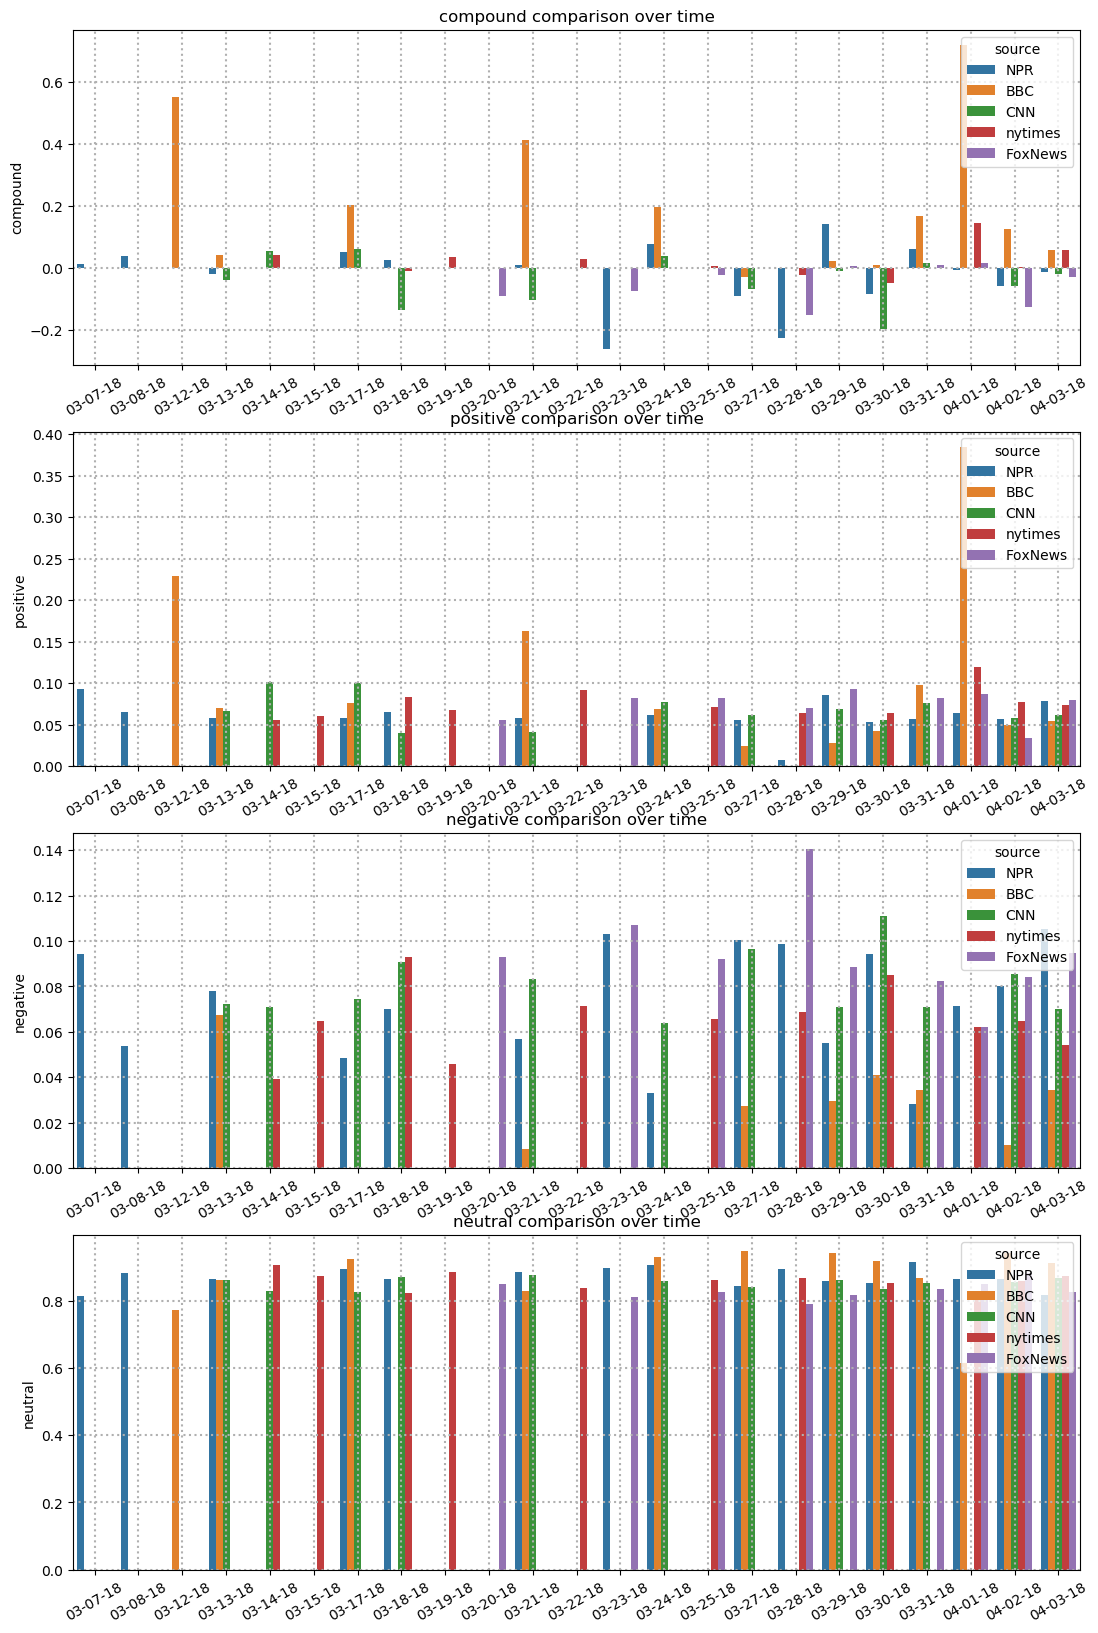

In [100]:
plt.figure(figsize=(13,20))
for i in range(len(sentilist)):
    plt.subplot(4,1,i+1)
    ax = sns.barplot(x=nocbs_df.index, y=sentilist[i], hue='source', data=nocbs_df, ci=None)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_xlabel('')
    ax.set_title(f'{sentilist[i]} comparison over time')
    ax.grid(ls='dotted', linewidth=1.5)

Generally we can see the same trends, that were noticed before: tweets from BBS are more positive comparing to FoxNews, NPR and CNN. Theese plots need more research. One way is to get a specific headline and compare the way it was interpreted by different sources.

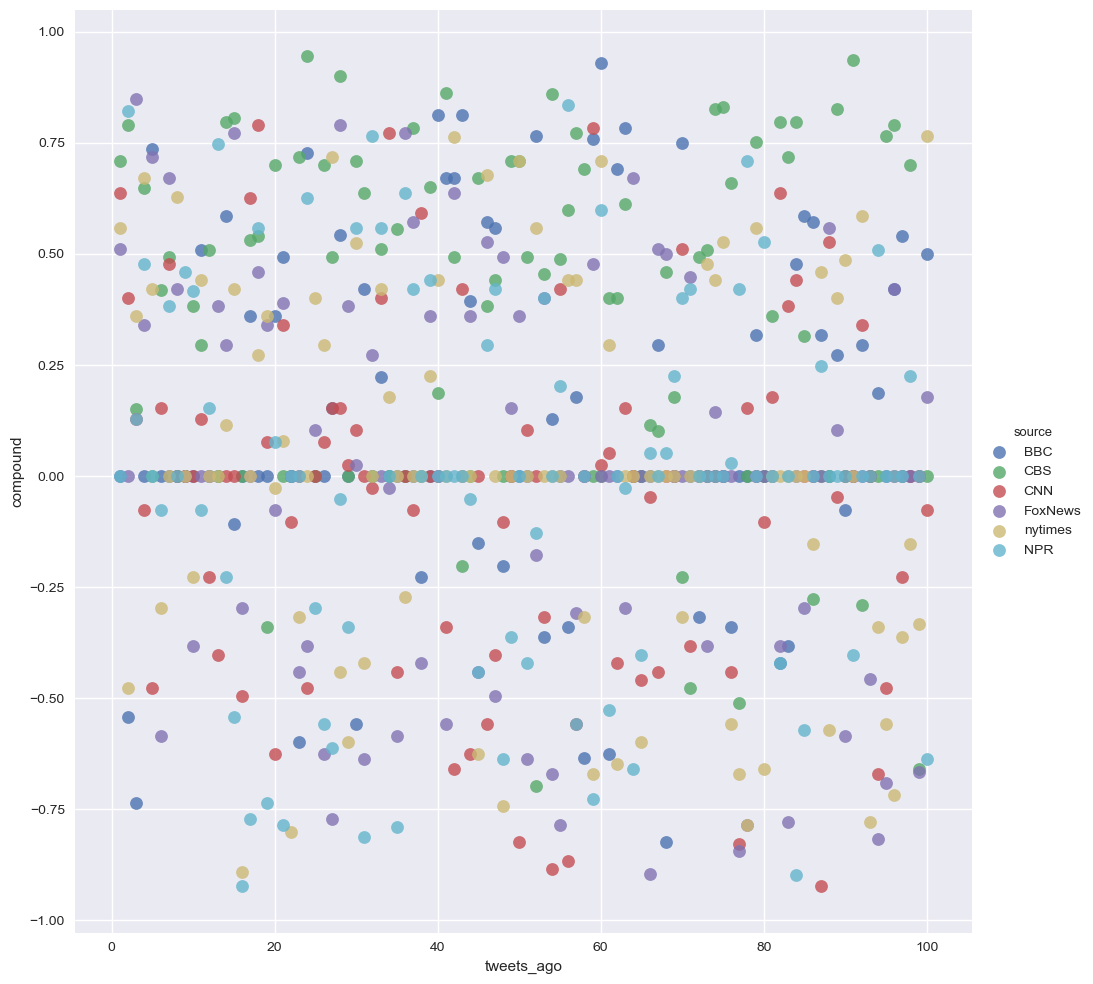

In [102]:
# Colored dots, what can be better?
sns.set()
sns.lmplot(x='tweets_ago', y='compound', data=df, hue="source", fit_reg=False, scatter=True, size=10,
           scatter_kws={"s":85})

In [ ]:
# What a wonderful plot, just can't erase it
plt.rcParams.update(plt.rcParamsDefault)
sns.factorplot(data=df, x="tweets_ago", y="compound", size=10, hue='user')